# AE4465 (MM&A) - Weibull distribution

The Weibull distribution is a continuous probability distribution that can fit an extensive range of distribution shapes. Unlike the normal distribution, it can model skewed data.

$${\displaystyle f(t;\lambda ,k)={\begin{cases}{\frac {k}{\lambda }}\left({\frac {t}{\lambda }}\right)^{k-1}e^{-(t/\lambda )^{k}},&t\geq 0,\\0,&t<0,\end{cases}}}$$

where $\lambda = \alpha $ is the scale parameter
where $k = \beta $ is the shape parameter
The failure function is given by:

$${\displaystyle F(t) = {\begin{cases}1-e^{-(t/\lambda )^{k}},&t\geq 0,\\0,&t<0.\end{cases}}}$$

The failure rate z (or hazard function) is given by

$$ z(t;k,\lambda )={k \over \lambda }\left({t \over \lambda }\right)^{k-1}$$

The Mean time between failures MTBF is

$$ \text{MTBF}(k,\lambda )=\lambda \Gamma (1+1/k)$$

### Discover the B10 life and use it to predict your failure times

B10 is a value used to estimate product lifetime. It provides a statistical life expectancy indication describing that minimum 90% of the products you have bought will meet or exceed lifetime expectations, when used in accordance with product specifications. Meanwhile, a maximum of 10% might fail.

Calculate the B10 from a set of weibull data.

In [1]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import reliability
from reliability.Distributions import Weibull_Distribution
from reliability.Fitters import Fit_Weibull_2P
import math

In [2]:
# Import the data in csv file
maintenance_dt = pd.read_csv('data//Weibull_data.csv')
# Read the columns
print('The columns of the csv file are: ')
# Iterate over two arrays (column names and index) and print accordingly
for colname, i in zip(maintenance_dt.columns, range(len(maintenance_dt.columns))):
    print(i, '- Column: ', colname)

The columns of the csv file are: 
0 - Column:  Equipment
1 - Column:  Time to failure


### Histogram and cumulative histogram

We will plot the histogram (equivalent to pdf) and the cumulative histogram  (equivalent to CDF).

Text(0, 0.5, 'Frequency')

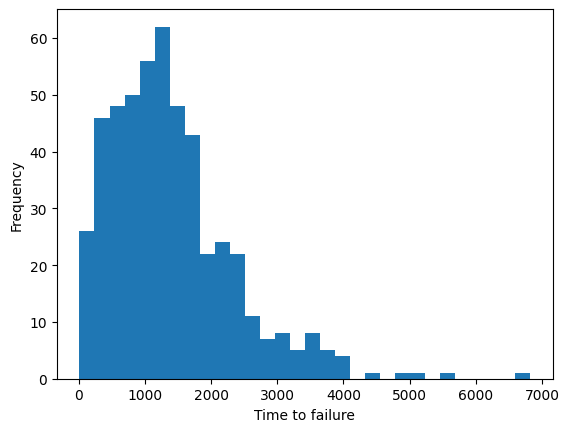

In [3]:
#plot the histogram and cumulative histogram
ttfs = maintenance_dt['Time to failure']
plt.hist(ttfs, bins=30)
plt.xlabel('Time to failure')
plt.ylabel('Frequency')

### Data fitting

We will work to obtain the data parameters of the Weibull distribution that best fits our data. The method used is maximum likelihood estimation (MLE). You will get estimates of alpha and beta (scale and shape). You can then use these values to obtain the B10 life of the "perfect" distribution that approximately generated your data.
Note that the pth percentile is the number t for which p% of the data is less than t.

Results from Fit_Weibull_2P (95% CI):
Analysis method: Maximum Likelihood Estimation (MLE)
Optimizer: TNC
Failures / Right censored: 500/0 (0% right censored) 

Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
    Alpha         1547.97         47.5729   1457.48   1644.07
     Beta         1.53338       0.0524015   1.43404    1.6396 

Goodness of fit    Value
 Log-likelihood -4056.92
           AICc  8117.87
            BIC  8126.28
             AD 0.621775 



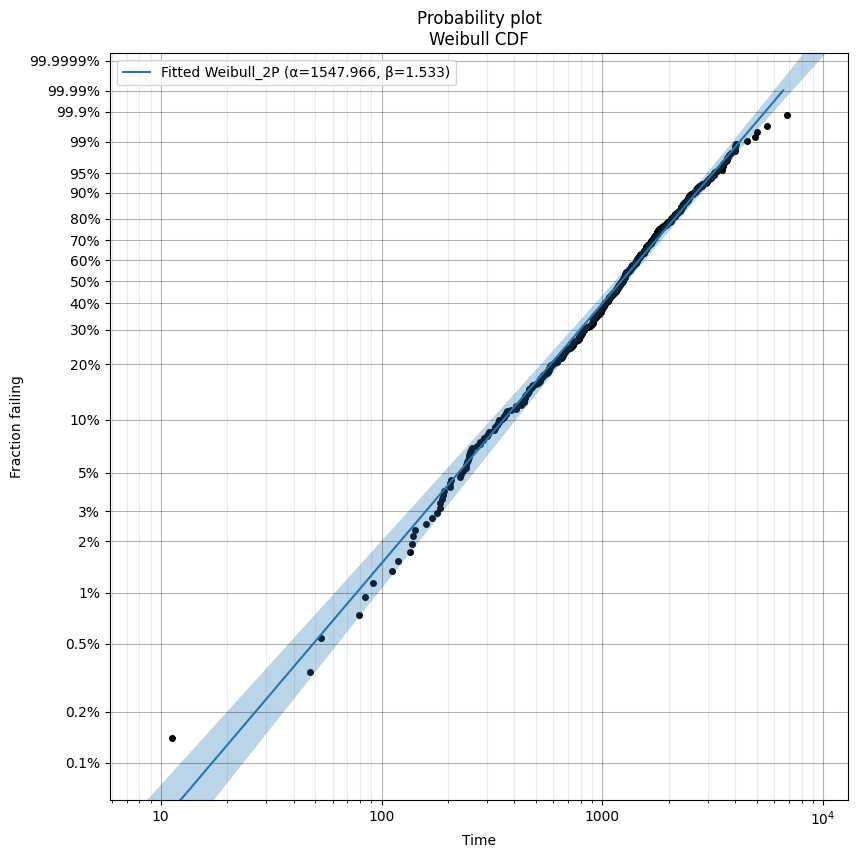

In [4]:
data = ttfs.values # made using Weibull Distribution
wb = Fit_Weibull_2P(failures=data) # fit weibull 2 parameters
plt.show()

In [9]:
# Calculating the B10
alpha = 1547.97
beta = 1.53338
X = reliability.Distributions.Weibull_Distribution(alpha=alpha, beta=beta)
print('Time at which 10% will have failed is', X.quantile(0.1))


Time at which 10% will have failed is 356.77790528733465


### Predictive Maintenance Schedule

Now, let us do a predictive maintenance schedule at fixed times (every 357 days) and see the results on the dataset. Create a loop over the failure times and see if the failure would be caught or not.

In [14]:
scheduled_ttf = X.quantile(0.1) # B10 life
errors = []
for ttf in ttfs.values:
    errors.append(ttf - scheduled_ttf)
errors = np.array(errors)
positive_errors = errors[errors >= 0] # you repair before failure
negative_errors = errors[errors < 0] # you let it fail
print('Number of repairs: ', len(positive_errors))
print('Number of failures not caught: ', len(negative_errors))
print('% of failures not caught: ',  len(negative_errors)/ len(positive_errors) * 100)

Number of repairs:  449
Number of failures not caught:  51
% of failures not caught: 11.358574610244988


### Impact analysis

Even if only 10% of the failures are uncaught, it is important to check the impact of the predictive maintenance schedule. We here do a preliminary analysis.

In [22]:
print('Loss of residual time: ', math.fabs(np.mean(negative_errors)))
print('Total loss of residual time: ', np.sum(np.abs(negative_errors)))

Loss of residual time:  138.48464567968756
Total loss of residual time:  7062.716929664066
